In [144]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  #library untuk membuat grafik dan statistik
%matplotlib inline # untuk memunculkan gambar plot statis di dalam notebook

sns.set(context='talk', palette='hls') #untuk pemilihan warna 

UsageError: unrecognized arguments: # untuk memunculkan gambar plot statis di dalam notebook


In [145]:
df = pd.read_csv('Pokemon.csv')
df.head() # Melihat lima data pertama

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [146]:
# untuk menghasilkan statistik deskriptif data dalam Pandas
df.describe() 

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [147]:
# Alternatif
df[df['Name'].str.contains('Mega')].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


In [148]:
# Membuang Pokemon mega evolution
df = df[~df['Name'].str.contains('Mega')]
df.shape

(751, 13)

In [149]:
# Inspeksi kembali terhadap data yang masih kelebihan (30 object)
df[730:]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
778,708,Phantump,Ghost,Grass,309,43,70,48,50,60,38,6,False
779,709,Trevenant,Ghost,Grass,474,85,110,76,65,82,56,6,False
780,710,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False
784,711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False


In [150]:
poke3 = df[df['Generation'].isin([1,2,3])] # Mengambil Pokemon dari tiga generasi pertama
poke3 = poke3.drop([422,424,429,430,431]) # Membuang beberapa Pokemon dalam bentuk lain
poke3.shape

(385, 13)

In [151]:
# Menentukan pokemon terkuat dari 3 generasi pertama menggunakan nilai atribut totalnya
poke3[poke3['Total'] == poke3['Total'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True


In [152]:
# Menentukan pokemon terlemah dari 3 generasi pertama menggunakan nilai atribut totalnya
poke3[poke3['Total'] == poke3['Total'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


In [153]:
#Menampilkan jumlah pokemon legendaris dari 3 generasi pertama
len(poke3[poke3['Legendary']])

19

In [154]:
# Menampilkan jumlah dari masing masing type 1 pokemon legendaris 3 generasi pertama
poke3[poke3['Legendary']]['Type 1'].value_counts()

Fire        3
Psychic     3
Dragon      3
Ice         2
Electric    2
Water       2
Steel       2
Rock        1
Ground      1
Name: Type 1, dtype: int64

In [155]:
# mengecek apakah rata-rata HP Pokemon legendaris lebih besar
poke3.groupby('Legendary')['HP'].agg(['mean','median','std'])

,mean,median,std
Legendary,,,
False,64.86612,60.0,28.106863
True,92.00000,90.0,14.985178


berdasarkan hasil diatas, tiga tipe 1 terbanyak dari Pokemon legendaris adalah *dragon*, *psychic*, dan *fire*. Sementara itu, secara rata-rata dan mediannya atribut HP Pokemon legendaris memang cenderung lebih tinggi. Ini mungkin karena beberapa Pokemon biasa masih merupakan bentuk awal (masih bisa berevolusi) sehingga wajar jika rata-rata HP Pokemon biasa lebih rendah dibandingkan Pokemon legendaris.

In [156]:
poke3[(poke3['HP'] > 180) | (poke3['Defense'] > 180) | (poke3['Sp. Def'] > 180)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True


kita akan mencari tahu berapa jumlah Pokemon berdasarkan masing-masing tipe pertamanya.


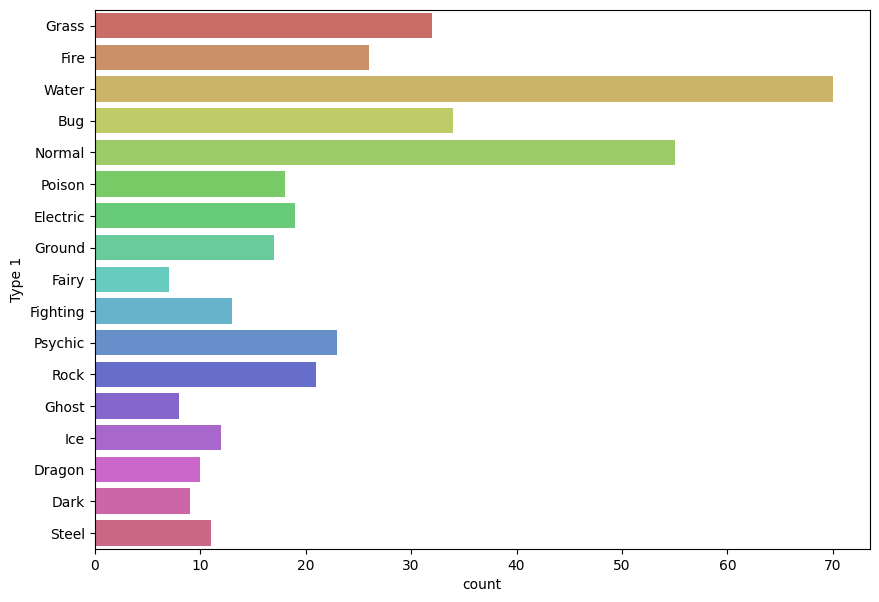

In [157]:
sns.countplot(y='Type 1', data=poke3, palette='hls');

Kita juga dapat melihat perubahan jumlah Pokemon per tipe untuk tiap generasi. Kita dapat membuat *pivot table* seperti dengan kode di bawah ini sebelum digambarkan dengan diagram garis (*line plot*).

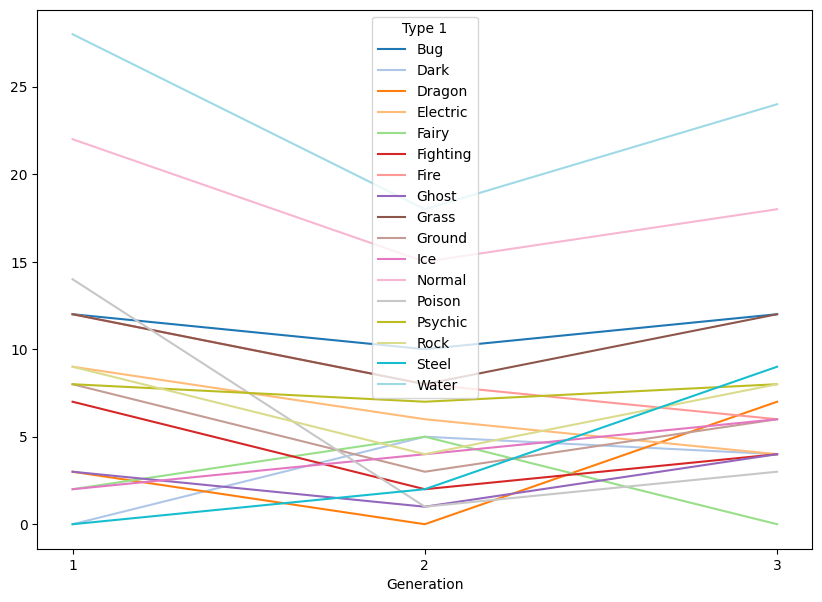

In [158]:
pv = pd.pivot_table(poke3, values='#', index=['Generation'], columns=['Type 1'], aggfunc='count').fillna(0)
ax = pv.plot.line(cmap='tab20')
ax.set_xticks([1,2,3]);

Diagram di atas menunjukkan bahwa tipe 1 terbanyak untuk Pokemon dari tiga generasi pertama adalah *water*.selanjutnya kita akan mencari tahu berapa jumlah Pokemon berdasarkan masing-masing tipe keduanya.

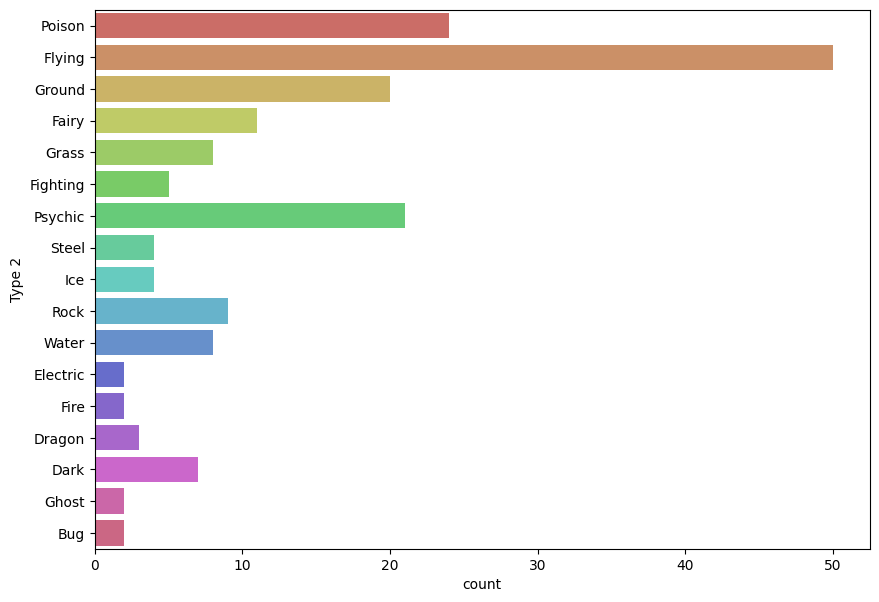

In [159]:
sns.countplot(y='Type 2', data=poke3, palette='hls');

Dapat dilihat bahwa tipe 2 didominasi oleh Flying yang bahkan tidak termasuk dalam tipe 1. Jadi, dapat kita ambil kesimpulan sementara bahwa mempunyai Pokemon tipe *ice*, *electric*, atau *rock* (yang efektif untuk menghadapi Pokemon tipe *flying*) dalam tim merupakan solusi yang cukup efektif karena peluang untuk menemukan Pokemon dengan tipe *flying* cukup besar.

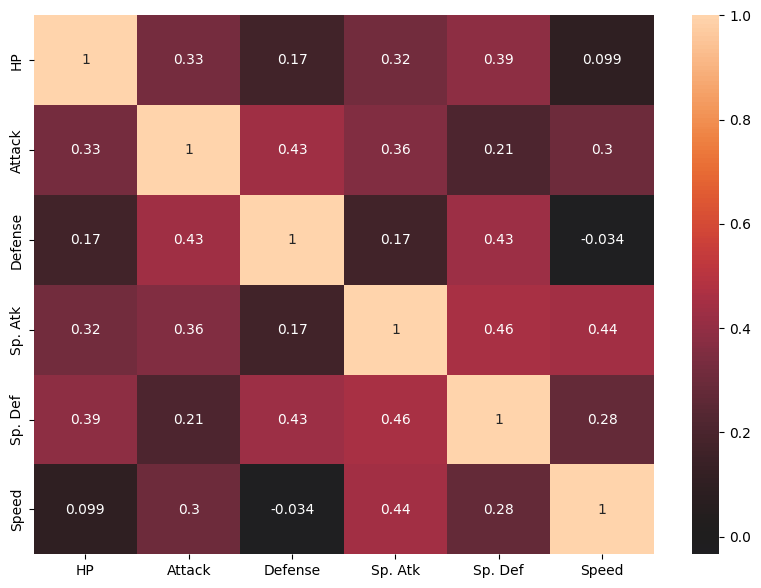

In [160]:
sns.heatmap(
    poke3[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr(),
    annot=True,
    center=0,
);

Dari *heatmap* di atas, didapatkan korelasi yang paling tinggi adalah antara Sp. Atk dengan Sp. Def. Sementara itu, beberapa atribut lain yang juga berkorelasi dengan cukup kuat adalah Sp. Atk dengan Speed, Attack dengan Defense, dan Sp. Def dengan Defense. Di sisi lain, Defense tidak terlihat berkorelasi kuat dengan Speed.